Lesson 3.3: Convolutional Layers

In [59]:
%matplotlib inline

import numpy as np
from scipy.misc import face
from theano import tensor as T, function
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.convolutional import  Convolution2D, MaxPooling2D

(768, 1024)


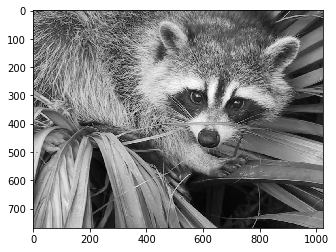

In [60]:
img = face(gray=True)
print(img.shape)
plt.imshow(img, cmap='gray')

I = img.reshape((1, 1, img.shape[0], img.shape[1]))

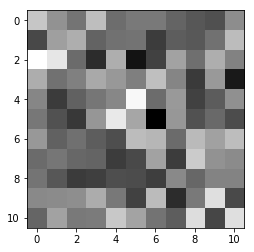

In [69]:
'''
w = [[0, 0, 0, 0, 0],
     [0, 0, -1, 0, 0],
     [0, -1, 4, -1, 0],
     [0, 0, -1, 0, 0],
     [0, 0, 0, 0, 0]]
w = np.asanyarray(w).reshape((1,1,5,5))
'''



w = np.random.randn(1, 1, 11, 11)

plt.imshow(w[0,0], cmap='gray')

In [70]:
X, W = T.tensor4s('X', 'W')
Y = T.nnet.conv2d(X, W,
                  border_mode='full',
                  input_shape=I[:1].shape,
                  filter_shape=w.shape)
F = function([X, W], Y, allow_input_downcast=True)

(1, 1, 778, 1034)


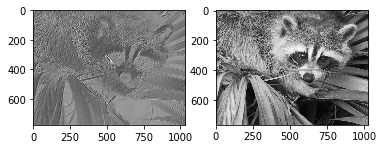

In [71]:
out = F(I, w)

print(out.shape)

plt.subplot(121)
plt.imshow(out[0, 0], cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')

In [72]:
nb_output_chan = 1
nb_rows = 11
nb_cols = 11
pool_row = 8  #Usually ~2, exaggerated for educational purposes
pool_col = 8

model = Sequential()
model.add(Convolution2D(nb_output_chan, (nb_rows, nb_cols), padding='valid', input_shape=I.shape[1:]))
model.add(MaxPooling2D(pool_size=(pool_row, pool_col)))

model.compile(loss='mse', optimizer='sgd')


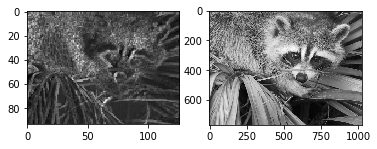

In [75]:
out = model.predict(I)

plt.subplot(121)
plt.imshow(out[0, 0], cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')